<a href="https://colab.research.google.com/github/Pimchanok6430205105/BSC_DPDM23/blob/main/Understanding_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load Data

##Load excel from google drive

In [32]:
import pandas as pd

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
data_from_gdrive = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/2563.xls',header=2)
data_from_gdrive

FileNotFoundError: ignored

##Load excel from google sheets

In [ ]:
!pip install gspread


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds,_ = default()

gc = gspread.authorize(creds)

In [ ]:
gsht = gc.open_by_key('d/1M2gRXb-eSMS99RxQe6n2hQHhFPEzUgtJxQKp6gw9q1I/edit#gid=540437041')

In [ ]:
worksheet2 = gsht.worksheet("มิ.ย. 2563")
rows = worksheet2.get_all_values()
data_from_gsheets = pd.DataFrame.from_records(rows)

##Load CSV from GG drive

In [35]:
shopping_data = pd.read_csv('/content/drive/MyDrive/BSC_DPDM23/customer_shopping_data.csv')

In [36]:
shopping_data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


#Basic stat

In [37]:
shopping_data.describe() #ดูข้อมูล stat อย่างง่าย เบื้องต้น

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


###How many payment method

In [39]:
shopping_data.value_counts('payment_method')

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
dtype: int64

In [40]:
shopping_data.groupby('payment_method').count()

,invoice_no,customer_id,gender,age,category,quantity,price,invoice_date,shopping_mall
payment_method,,,,,,,,,
Cash,44447,44447,44447,44447,44447,44447,44447,44447,44447
Credit Card,34931,34931,34931,34931,34931,34931,34931,34931,34931
Debit Card,20079,20079,20079,20079,20079,20079,20079,20079,20079


In [41]:
set(shopping_data['payment_method'])

{'Cash', 'Credit Card', 'Debit Card'}

In [42]:
shopping_data['payment_method'].unique

<bound method Series.unique of 0        Credit Card
1         Debit Card
2               Cash
3        Credit Card
4               Cash
            ...     
99452    Credit Card
99453           Cash
99454     Debit Card
99455           Cash
99456    Credit Card
Name: payment_method, Length: 99457, dtype: object>

##คนอายุมากกว่า 40 มีค่าเฉลี่ยของราคาสินค้าที่ซื้อเท่าไหร่

In [43]:
import pandas as pd
shopping_data[shopping_data['Age'] > 40].mean() #เทียบกับ Percent tile แล้วถือว่ายังจ่ายน้อย

KeyError: ignored

#Visualization

In [44]:
import matplotlib.pyplot as plt

Branches distribution

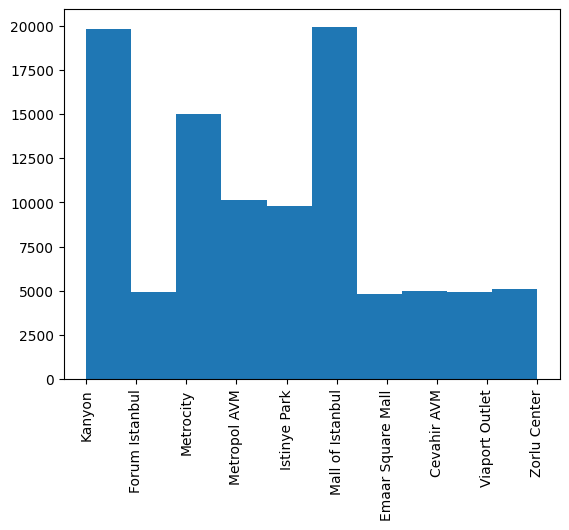

In [55]:
histoutput = plt.hist(shopping_data['shopping_mall'])
tickhist = plt.xticks(rotation='vertical')

In [51]:
histoutput[0]

array([19823.,  4947., 15011., 10161.,  9781., 19943.,  4811.,  4991.,
        4914.,  5075.])

In [56]:
tickhist[-1]

[Text(0, 0, 'Kanyon'),
 Text(1, 0, 'Forum Istanbul'),
 Text(2, 0, 'Metrocity'),
 Text(3, 0, 'Metropol AVM'),
 Text(4, 0, 'Istinye Park'),
 Text(5, 0, 'Mall of Istanbul'),
 Text(6, 0, 'Emaar Square Mall'),
 Text(7, 0, 'Cevahir AVM'),
 Text(8, 0, 'Viaport Outlet'),
 Text(9, 0, 'Zorlu Center')]

In [58]:
tickhist[-1][0].get_text()

'Kanyon'

#Scatter

##Is there a trend in age vs. price?

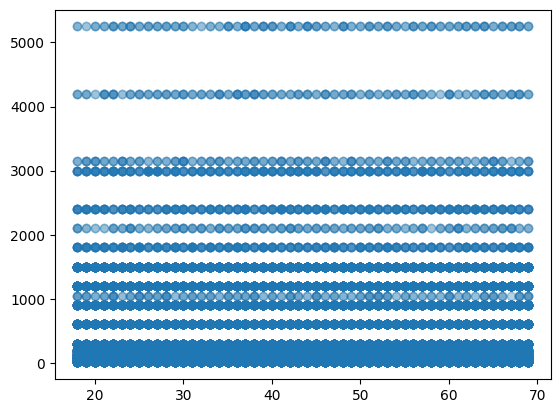

In [60]:
plt.scatter(shopping_data['age'],shopping_data['price'],alpha=0.05)

##Is there a trend in age vs. quantity?

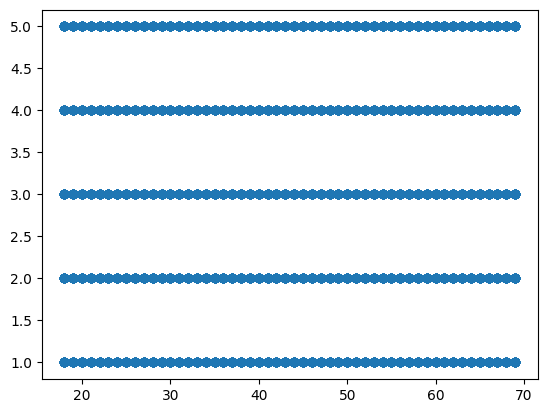

In [63]:
plt.scatter(shopping_data['age'],shopping_data['quantity'],alpha=0.05)

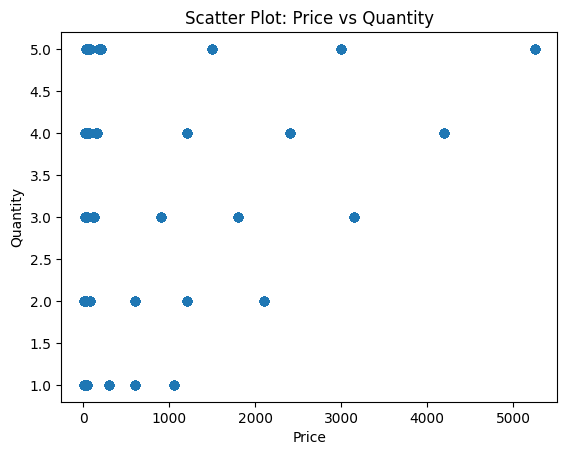

In [65]:
plt.scatter(shopping_data['price'],shopping_data['quantity'],alpha=0.05)
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Scatter Plot: Price vs Quantity')

# Show the plot
plt.show()

#Box-plot

##หาว่า Price มี outlier มั้ย

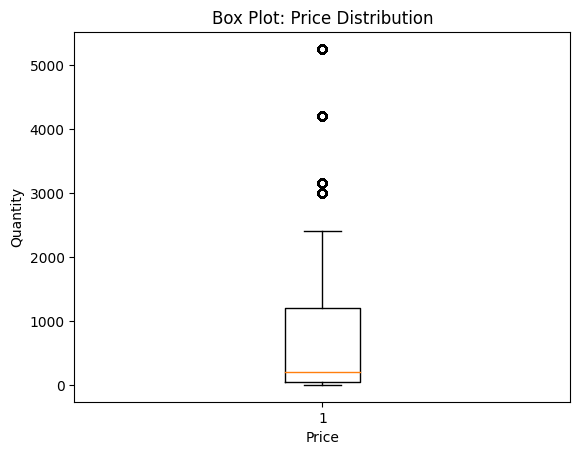

In [68]:
# Box plot
plt.boxplot(shopping_data['price'])

# Set labels and title
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Box Plot: Price Distribution')

# Show the plot
plt.show()

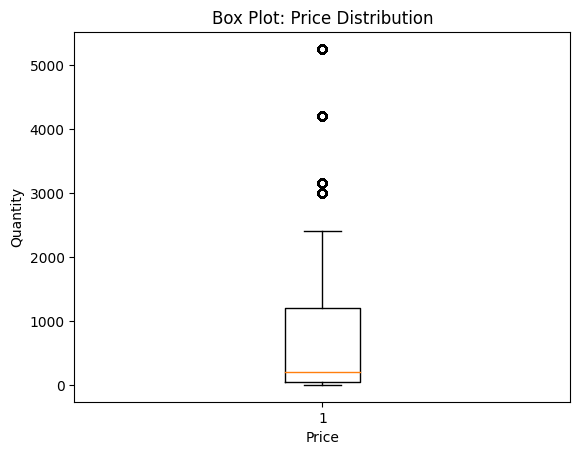

In [69]:
# Box plot
bpreturn = plt.boxplot(shopping_data['price'])

# Set labels and title
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Box Plot: Price Distribution')

# Show the plot
plt.show()

In [70]:
bpreturn['filiers'].get_ydata

KeyError: ignored

Number of outliers: 5024


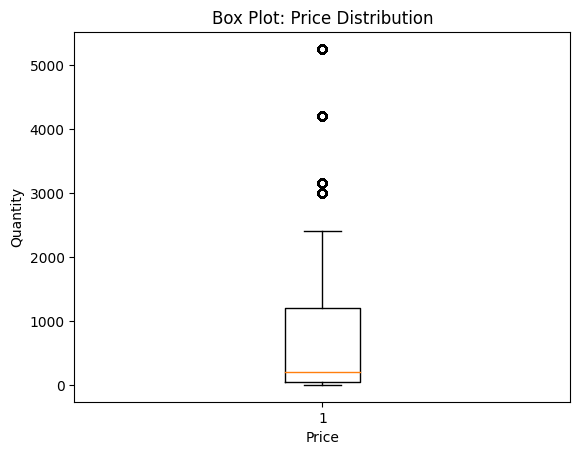

In [72]:
import matplotlib.pyplot as plt

# Create a box plot
box_plot_dict = plt.boxplot(shopping_data['price'])

# Extract the fliers (outliers) from the dictionary
outliers = [flier.get_ydata() for flier in box_plot_dict['fliers']]

# Count the number of outliers
num_outliers = sum(len(outlier) for outlier in outliers)

# Display the number of outliers
print(f"Number of outliers: {num_outliers}")

# Show the plot
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Box Plot: Price Distribution')
plt.show()


#Pie chart

##ration of male and female customers

In [ ]:
males = len()
females =len()


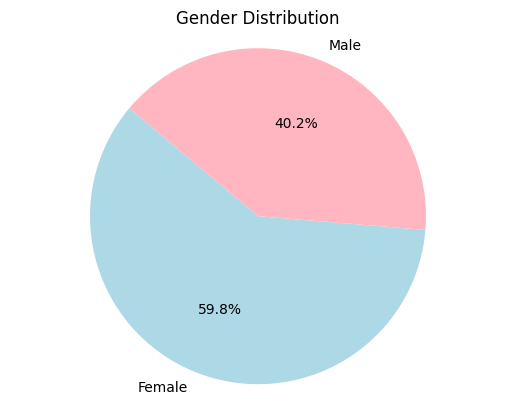

In [77]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the 'gender' column
gender_counts = shopping_data['gender'].value_counts()

# Extract labels and sizes
labels = gender_counts.index
sizes = gender_counts.values

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'])

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.title('Gender Distribution')
plt.show()


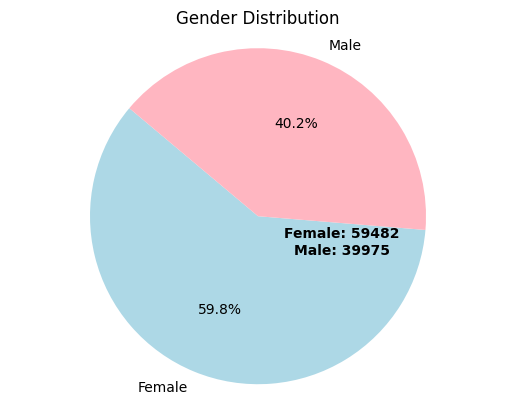

In [78]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the 'gender' column
gender_counts = shopping_data['gender'].value_counts()

# Extract labels and sizes
labels = gender_counts.index
sizes = gender_counts.values

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'])

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the count next to each slice
for i, (label, size) in enumerate(zip(labels, sizes)):
    plt.text(0.5, -0.1 - 0.1 * i, f"{label}: {size}", ha='center', va='center', color='black', fontweight='bold')

# Display the plot
plt.title('Gender Distribution')
plt.show()


#Bar chart

##Stacked

In [79]:
shopping_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [80]:
set(shopping_data['category'])

{'Books',
 'Clothing',
 'Cosmetics',
 'Food & Beverage',
 'Shoes',
 'Souvenir',
 'Technology',
 'Toys'}

###เปรียบเทียบชนิดสินค้าที่ซื้อในแต่ละ shopping mall แบบภาพรวมของแต่ละ shopping mall

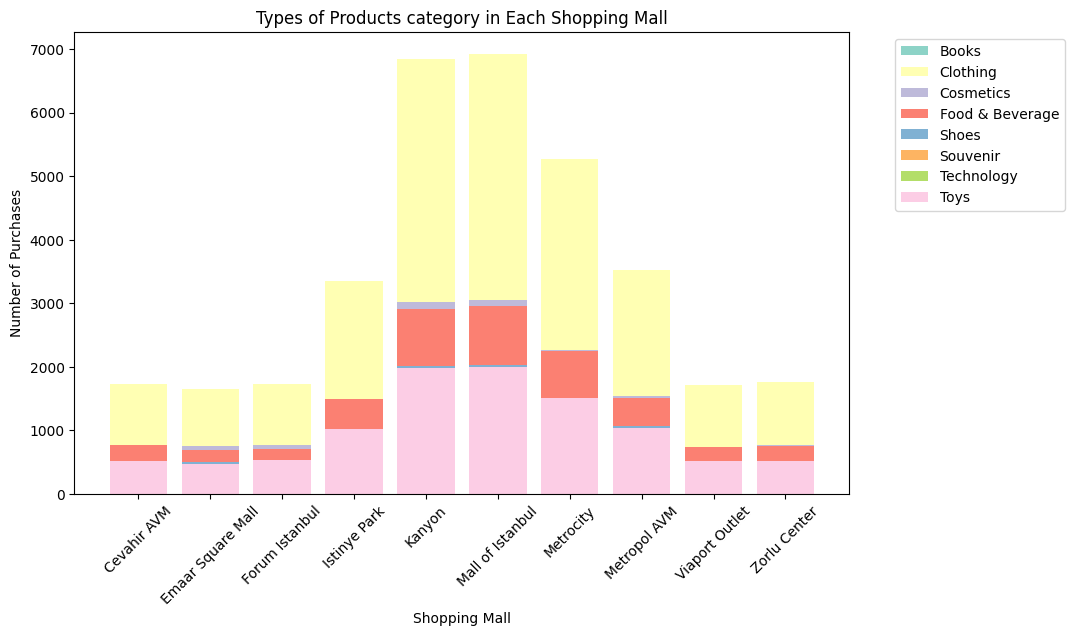

In [85]:
# Create a pivot table to count occurrences of each category in each shopping mall
pivot_data = shopping_data.pivot_table(index='shopping_mall', columns='category', aggfunc='size', fill_value=0)

# Plotting a stacked bar chart
plt.figure(figsize=(10, 6))

categories = pivot_data.columns
num_categories = len(pivot_data.columns)

# Set a color for each category
colors = plt.cm.Set3.colors[:num_categories]

# Plot each category as a stacked bar
for i, category in enumerate(categories):
    plt.bar(pivot_data.index, pivot_data[category], label=category, color=colors[i])

# Add labels and title
plt.xlabel('Shopping Mall')
plt.ylabel('Number of Purchases')
plt.title('Types of Products category in Each Shopping Mall')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.xticks(rotation=45)

# Show the plot
plt.show()


##Group

###เปรียบเทียบปริมาณชนิดสินค้าที่ซื้อในแต่ละ shopping mall เป็นราย shopping mall

In [90]:
width = 0.2
plt.bar([1-width,2-width, 3-width/2,4-width/2,5-width/2,6-width/2,7-width/2,8-width/2,9-width/2, 10-width/21
  ,bardata | 'Books 'I,width, color='b', label='Books")
plt.bar([1+width,2+width/2,3+width/2,4+width/2,5+width/2,6+width/2,7+width/2,8+width/2,9+width/2,10+width/2
  ,bardata ['Souvenir'],width, color='r', label='Souvenir')
plt.xticks([1,2,3,4,5,6, 7,8,9, 10], bardata.reset_index ()('shopping_mall')], rotation=270) plt.legend();

SyntaxError: ignored

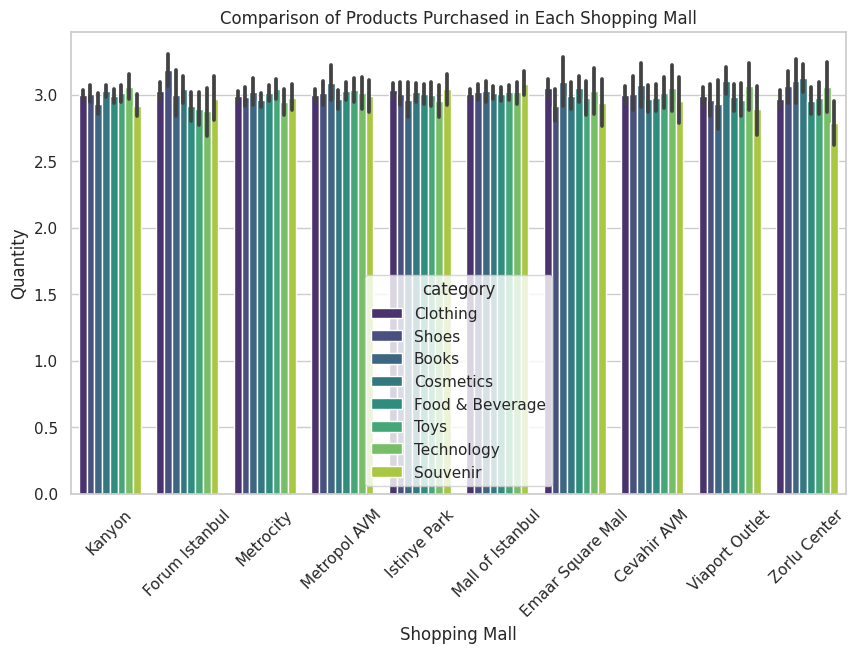

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use Seaborn to create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.barplot(x='shopping_mall', y='quantity', hue='category', data=shopping_data, palette='viridis')

# Add labels and title
plt.xlabel('Shopping Mall')
plt.ylabel('Quantity')
plt.title('Comparison of Products Purchased in Each Shopping Mall')
plt.xticks(rotation=45)

# Show the plot
plt.show()


#Distance - Similarity

In [91]:
from numpy import linalg as LA

In [93]:
import numpy as np

In [97]:
data_points = np.array([[1,2],[-1,4],[0,-3],[-3,-2]])

In [98]:
data_points

array([[ 1,  2],
       [-1,  4],
       [ 0, -3],
       [-3, -2]])

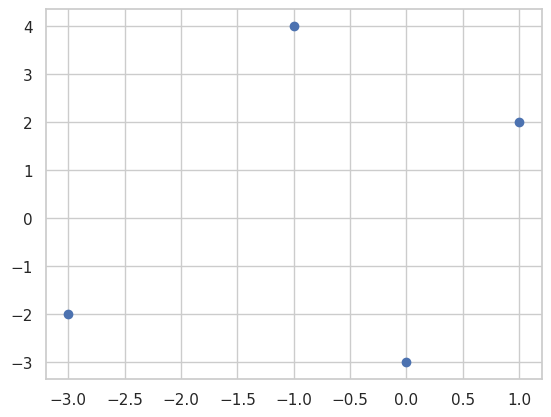

In [101]:
plt.scatter(data_points[:,0],data_points[:,1])

In [104]:
pip install scipy

In [105]:
from scipy.spatial import distance_matrix

In [106]:
distance_matrix(data_points,data_points)

array([[0.        , 2.82842712, 5.09901951, 5.65685425],
       [2.82842712, 0.        , 7.07106781, 6.32455532],
       [5.09901951, 7.07106781, 0.        , 3.16227766],
       [5.65685425, 6.32455532, 3.16227766, 0.        ]])

In [107]:
distance_matrix(data_points,data_points,p=1) # p=1 คือ City block distance

array([[0., 4., 6., 8.],
       [4., 0., 8., 8.],
       [6., 8., 0., 4.],
       [8., 8., 4., 0.]])

In [ ]:
plt.scatter(data_points[:,0],data_points[:,1])

## z-score